In [26]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn.set(style="ticks")
sns.set_style("whitegrid")

In [27]:
group_labels = ['2-3', '4-8', '9-50']
types = [
    {
        'key': 'ranks',
        'name': 'KL',
        'title': 'KL Divergence'
    },
    {
        'key': 'decoy_ranks',
        'name': 'Decoy',
        'title': 'KL Divergence from Decoy Model'
    },
    {
        'key': 'real_ranks',
        'name': 'Real',
        'title': 'KL Divergence from Real Model'
    },
    {
        'key': 'combined_ranks',
        'name': 'Combined',
        'title': 'KL Divergence from Combined Model'
    }
]

In [28]:
def describe(group):
    s = pd.Series(group['ranks'])
    return s.describe()

def get_frame(group):
    frame = {
        'rank': [],
        'label': []
    }
    
    for t in types:
        key, name = t['key'], t['name']
        ranks = group[key]
        
        for rank in ranks:
            frame['rank'].append(rank)
            frame['label'].append(name)

    return frame

In [29]:
def box_plot(group):
    frame = get_frame(group['data'])
    df = pd.DataFrame(data=frame)
    # print(df)
    sns.boxplot(x="label", y="rank", data=df, palette="PRGn").set_title('Group {}'.format(group['name']))
    sns.despine(offset=10, trim=True)

In [30]:
def construct_groups():
    groups = []
    for label in group_labels:
        with open('results/group_{}.json'.format(label), 'r') as f:
            data = json.load(f)
        groups.append({
            'name': label,
            'data': data
        })
    return groups

In [31]:
groups = construct_groups()

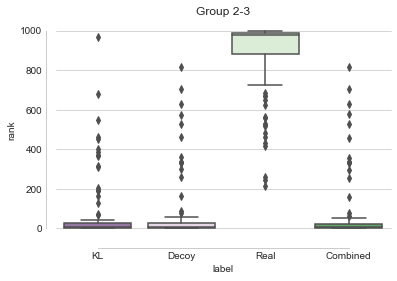

In [32]:
box_plot(groups[0])

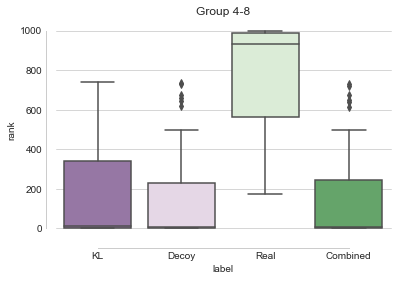

In [33]:
box_plot(groups[1])

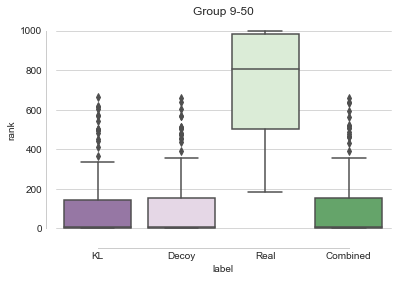

In [34]:
box_plot(groups[2])